<a href="https://colab.research.google.com/github/Rigboone-68/Dark-Matter-Analysis/blob/main/Gaia_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()  # This will prompt you to upload kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"qasimajlal","key":"4d46ec72b93a57cbf6963287e2090710"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # To set permissions

In [3]:
# Unzip the dataset
!unzip gaia.zip

Archive:  gaia.zip
  inflating: dataGaia.csv            


In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('dataGaia.csv', encoding='latin-1', header=None)

# Display the first few rows
df.head()


<ipython-input-4-00c516cfe4dd>:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataGaia.csv', encoding='latin-1', header=None)


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,RA_ICRS,DE_ICRS,Source,Plx,PM,pmRA,pmDE,Gmag,e_Gmag,...,G-RP,pscol,Teff,Dist,Rad,Lum-Flame,Mass-Flame,Age-Flame,z-Flame,SpType-ELS
1,0.0,47.45110989955,2.20545667373,740830319452928,1.175,8.488,2.263,-8.181,10.966603,0.002786,...,0.090974,NaN,9406.7,918.2012,2.3686,33.161472,2.255,0.404,0.52721465,A
2,1.0,44.37518651531,2.89590143905,1402912413121792,1.8937,16.954,7.031,-15.427,10.369156,0.002801,...,0.163792,NaN,9348.7,679.7121,2.4642,25.817343,2.157,0.336,0.63808256,A
3,2.0,42.95930440776,2.92045915982,1546703623466880,2.9732,2.528,1.795,1.78,10.038978,0.002774,...,0.304139,NaN,7520.7,339.8108,1.9321,10.527038,1.688,1.033,0.50755084,A
4,3.0,44.03107949703,3.20368313307,1614053005633024,2.2337,10.776,-3.151,-10.305,9.810181,0.002786,...,0.338961,1.5956,7052.3,433.9715,2.9735,20.801886,1.923,1.124,0.36829424,A


In [5]:
import pandas as pd

# Load your dataset
df = pd.read_csv('dataGaia.csv')

# Describe the dataset
print(df.describe())

# Check total number of rows (datapoints) and columns (features)
print(f"Total Datapoints: {df.shape[0]}")
print(f"Total Features: {df.shape[1]}")

# Display the first few rows
print(df.head())


          Unnamed: 0        RA_ICRS        DE_ICRS        Source  \
count  611689.000000  611689.000000  611689.000000  6.116890e+05   
mean    47422.859898     109.491138      27.375246  1.013625e+18   
std     28774.834121      99.486049      26.856553  1.382727e+18   
min         0.000000       0.000205     -89.098460  3.865554e+10   
25%     21846.000000      46.677751      18.623979  1.415008e+17   
50%     46638.000000      67.259343      31.172183  2.137034e+17   
75%     72125.000000     110.040669      43.118327  1.866048e+18   
max     99999.000000     359.997541      89.774031  6.916186e+18   

                 Plx             PM           pmRA           pmDE  \
count  611689.000000  611689.000000  611689.000000  611689.000000   
mean        1.490339      11.264492       1.416328      -5.646765   
std         2.030546      19.482668      16.120819      14.583911   
min        -5.014100       0.002000    -584.663000    -583.413000   
25%         0.320800       2.450000      -

In [6]:
import pandas as pd

# Load your dataset
data = pd.read_csv('dataGaia.csv')

# 1. Drop unnecessary columns
data = data.drop(columns=['Unnamed: 0'], errors='ignore')

# 2. Handle missing values
# Fill numerical columns with the mean
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols] = data[num_cols].fillna(data[num_cols].mean())

# Fill categorical columns with the mode
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

# 3. Convert data types if necessary
# Example: converting a column to 'category' type
data['SpType-ELS'] = data['SpType-ELS'].astype('category')

# Check the cleaned data
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611689 entries, 0 to 611688
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   RA_ICRS     611689 non-null  float64 
 1   DE_ICRS     611689 non-null  float64 
 2   Source      611689 non-null  int64   
 3   Plx         611689 non-null  float64 
 4   PM          611689 non-null  float64 
 5   pmRA        611689 non-null  float64 
 6   pmDE        611689 non-null  float64 
 7   Gmag        611689 non-null  float64 
 8   e_Gmag      611689 non-null  float64 
 9   BPmag       611689 non-null  float64 
 10  e_BPmag     611689 non-null  float64 
 11  RPmag       611689 non-null  float64 
 12  e_RPmag     611689 non-null  float64 
 13  GRVSmag     611689 non-null  float64 
 14  e_GRVSmag   611689 non-null  float64 
 15  BP-RP       611689 non-null  float64 
 16  BP-G        611689 non-null  float64 
 17  G-RP        611689 non-null  float64 
 18  pscol       611689 non-n

In [ ]:
import pandas as pd

# Load your dataset
data = pd.read_csv('dataGaia.csv')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 611689 entries, 0 to 611688
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  611689 non-null  int64  
 1   RA_ICRS     611689 non-null  float64
 2   DE_ICRS     611689 non-null  float64
 3   Source      611689 non-null  int64  
 4   Plx         611689 non-null  float64
 5   PM          611689 non-null  float64
 6   pmRA        611689 non-null  float64
 7   pmDE        611689 non-null  float64
 8   Gmag        611688 non-null  float64
 9   e_Gmag      611688 non-null  float64
 10  BPmag       611688 non-null  float64
 11  e_BPmag     611688 non-null  float64
 12  RPmag       611689 non-null  float64
 13  e_RPmag     611689 non-null  float64
 14  GRVSmag     507721 non-null  float64
 15  e_GRVSmag   507721 non-null  float64
 16  BP-RP       611688 non-null  float64
 17  BP-G        611688 non-null  float64
 18  G-RP        611688 non-null  float64
 19  ps

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


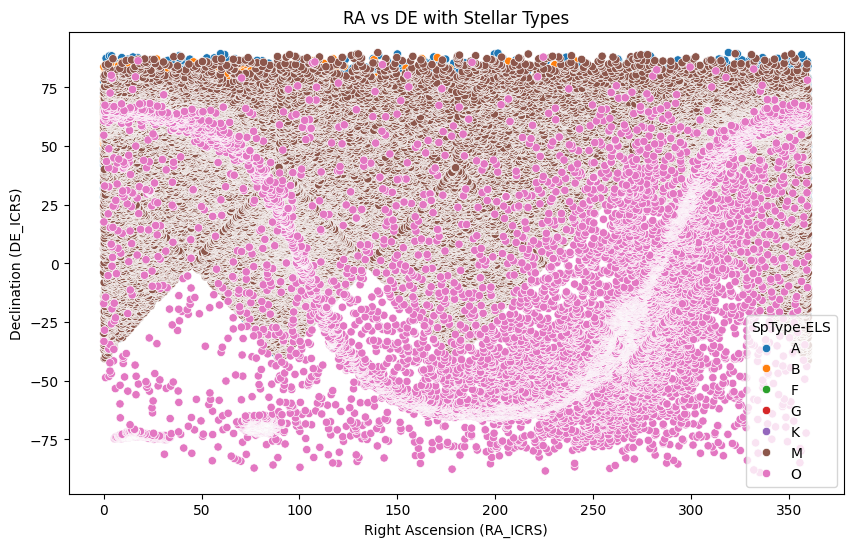

             RA_ICRS        DE_ICRS        Source            Plx  \
count  611689.000000  611689.000000  6.116890e+05  611689.000000   
mean      109.491138      27.375246  1.013625e+18       1.490339   
std        99.486049      26.856553  1.382727e+18       2.030546   
min         0.000205     -89.098460  3.865554e+10      -5.014100   
25%        46.677751      18.623979  1.415008e+17       0.320800   
50%        67.259343      31.172183  2.137034e+17       0.872600   
75%       110.040669      43.118327  1.866048e+18       1.659900   
max       359.997541      89.774031  6.916186e+18      95.047700   

                  PM           pmRA           pmDE           Gmag  \
count  611689.000000  611689.000000  611689.000000  611689.000000   
mean       11.264492       1.416328      -5.646765      13.720603   
std        19.482668      16.120819      14.583911       1.690559   
min         0.002000    -584.663000    -583.413000       2.740842   
25%         2.450000      -2.274000      -

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example of a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='RA_ICRS', y='DE_ICRS', hue='SpType-ELS')
plt.title('RA vs DE with Stellar Types')
plt.xlabel('Right Ascension (RA_ICRS)')
plt.ylabel('Declination (DE_ICRS)')
plt.show()

# Descriptive statistics
print(data.describe())


In [9]:
import pandas as pd

# Load the cleaned dataset
data = pd.read_csv('gaia_cleaned_data.csv')

# Check the dataset
print(data.head())
print(data.info())

# Drop rows with NaN values in target columns
target_columns = ['Lum-Flame', 'Mass-Flame', 'Age-Flame', 'z-Flame']
data_cleaned = data.dropna(subset=target_columns)

# Optionally drop non-predictive columns like 'Unnamed: 0' and 'Source'
data_cleaned = data_cleaned.drop(columns=['Unnamed: 0', 'Source'])


   Unnamed: 0  RA_ICRS  DE_ICRS   Source   Plx     PM  pmRA  pmDE   Gmag  \
0           0   109.49    27.37  1013625  1.49  11.26  1.41 -5.64  13.72   
1           1   109.49    27.37  1013625  1.49  11.26  1.41 -5.64  13.72   
2           2   109.49    27.37  1013625  1.49  11.26  1.41 -5.64  13.72   
3           3   109.49    27.37  1013625  1.49  11.26  1.41 -5.64  13.72   
4           4   109.49    27.37  1013625  1.49  11.26  1.41 -5.64  13.72   

     e_Gmag  ...  G-RP  pscol     Teff     Dist   Rad  Lum-Flame  Mass-Flame  \
0  0.002857  ...   0.6    1.0  7194.98  2106.05  8.14     112.63        1.81   
1  0.002857  ...   0.6    1.0  7194.98  2106.05  8.14     112.63        1.81   
2  0.002857  ...   0.6    1.0  7194.98  2106.05  8.14     112.63        1.81   
3  0.002857  ...   0.6    1.0  7194.98  2106.05  8.14     112.63        1.81   
4  0.002857  ...   0.6    1.0  7194.98  2106.05  8.14     112.63        1.81   

   Age-Flame  z-Flame  SpType-ELS  
0       3.81     0.44     